In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

#### Political blogs


In [2]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

# real_g = "power.gml"
# g = loadgraph(real_g, GraphIO.GML.GMLFormat())
# g = SimpleGraph(g)

{4941, 6594} undirected simple Int64 graph

##### take largest connected component

In [3]:
temp = connected_components(g)
g = g[temp[1]]

rng = Random.default_rng()
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B';

In [4]:
l = eigvals(L)
l[1:5]

5-element Vector{Float64}:
 5.380088612941801e-15
 0.0007592122113497333
 0.0010883168887991686
 0.0016445637089590982
 0.0029017567514175117

In [6]:
nv(meta_g)

4941

In [7]:
q = 0.1
n_tot = 4
n_rep = 1

D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng)

DPP unif


DPP LS


iid unif


iid LS


ST unif


ST LS


Dict{Any, Any} with 6 entries:
  "DPP unif" => Dict{String, Any}("sp_L_std"=>[NaN; NaN; NaN; NaN], "cdL"=>202.…
  "iid LS"   => Dict{String, Any}("sp_L_std"=>[NaN; NaN; NaN; NaN], "cdL"=>202.…
  "ST unif"  => Dict{String, Any}("sp_L_std"=>[NaN; NaN; NaN; NaN], "cdL"=>202.…
  "ST LS"    => Dict{String, Any}("sp_L_std"=>[NaN; NaN; NaN; NaN], "cdL"=>202.…
  "iid unif" => Dict{String, Any}("sp_L_std"=>[NaN; NaN; NaN; NaN], "cdL"=>202.…
  "DPP LS"   => Dict{String, Any}("sp_L_std"=>[NaN; NaN; NaN; NaN], "cdL"=>202.…

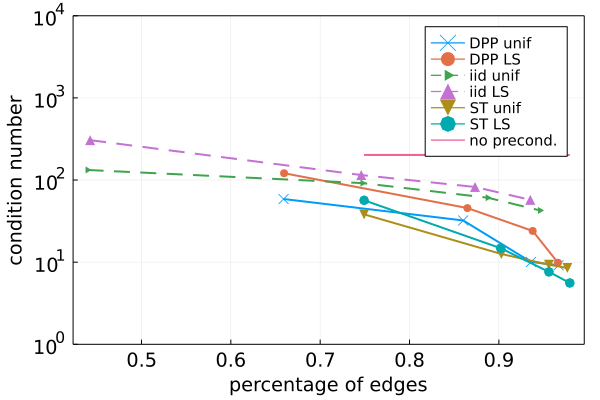

In [8]:
y_limits = (1,1e4)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

In [11]:
foldername = "figures/"
name = "PolBlogs"*"q"*string(q)*".pdf"
savefig(foldername*name)

In [13]:
method = "DPP unif"
plot_nb_roots(D_all, method; legendposition=:topleft)

foldername = "figures/"
name = "PolBlogs_roots_"*"q"*string(q)*".pdf"
savefig(foldername*name)

#### smaller q

In [25]:
q = 0.001
n_tot = 6
n_rep = 1

D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng)

InterruptException: InterruptException:

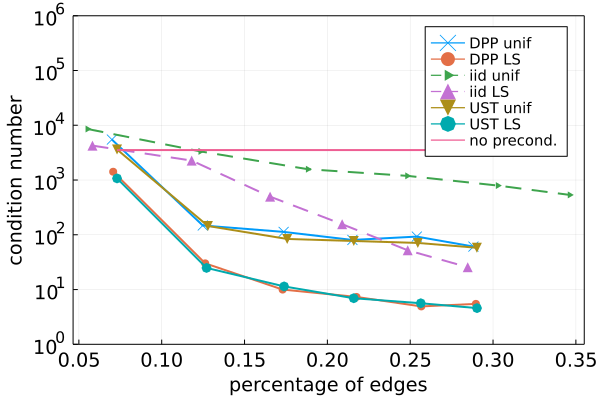

In [26]:
y_limits = (1,1e6)
plot_comparison_cond(D_all,y_limits;legendposition=:topright)

In [18]:
foldername = "figures/"
name = "PolBlogs"*"q"*string(q)*".pdf"
savefig(foldername*name)

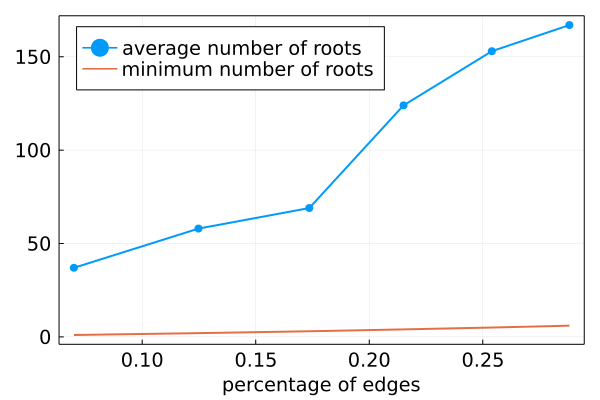

In [27]:
method = "DPP unif"

plot_nb_roots(D_all, method; legendposition=:topleft)

In [ ]:
foldername = "figures/"
name = "PolBlogs_roots_"*"q"*string(q)*".pdf"
savefig(foldername*name)

In [28]:

D_UST = D_all["UST LS"]
t_UST = D_UST["timing"]

6×1 Matrix{Float64}:
 0.716340524
 1.326995358
 2.168738375
 2.503262671
 3.175875749
 3.697067166

In [29]:
D_DPP = D_all["DPP LS"]
t_DPP = D_DPP["timing"]

6×1 Matrix{Float64}:
 0.611151704
 1.149023627
 1.995181012
 2.597964817
 3.10250027
 3.828220481

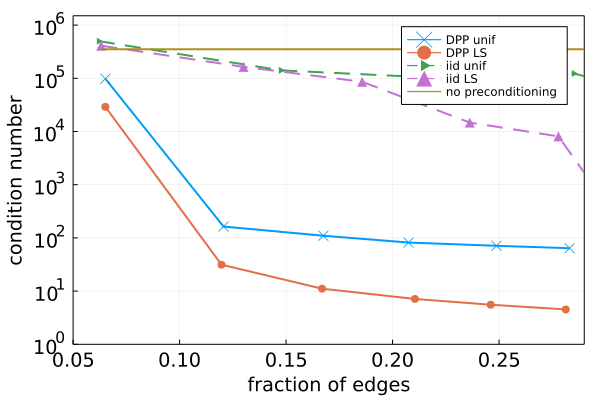

In [5]:
method = "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]
plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
framestyle = :box,
linewidth=2,
markerstrokewidth=2,
margins = 0.1*2Plots.cm)

ylims!((1e0,1.5*1e6))
xlims!((0.05,0.29))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])

# foldername = "figures/"
# type = "precond_"
# name = type*real_g*string(q)*".pdf"
# savefig(foldername*name)

#### Books about US politics


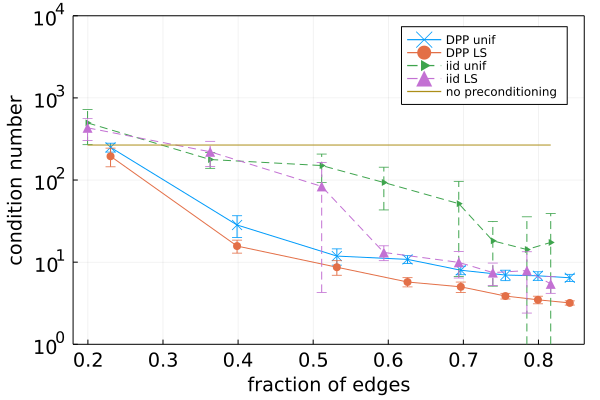

In [13]:
real_g = "polbooks.gml"

g = loadgraph(real_g, GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

meta_g = MetaGraph(g)

for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.1
n_tot = 8
n_rep = 10

D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng)



In [19]:
foldername = "figures/"
type = "precond_"
name = type*real_g*string(q)*".pdf"
savefig(foldername*name)
